<a href="https://colab.research.google.com/github/waleedGeorgy/deep-learning/blob/main/TensorFlow_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction and Data Preparation

**Classification** is a supervised machine learning method where the model tries to predict the correct label of a given input data, where the label is qualitative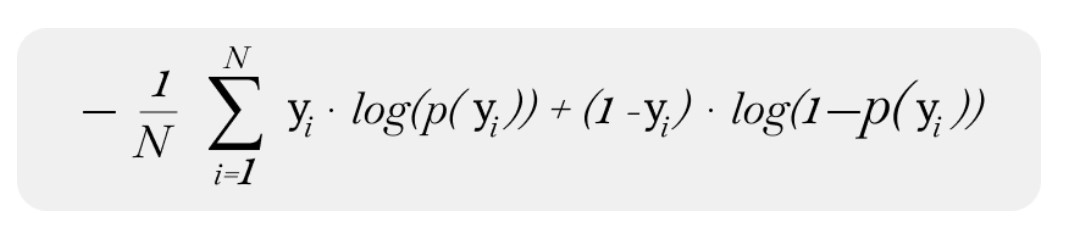. Classification can be **binary** (where a data point is classified into one of two classes), **multi-class** (where a data point is classified into one of $n$ classes) or **multilabel** classification (where a data point can be classified into multiple classes), and the ultimate goal is to correctly classify each data entry into the correct class using its features.

Example of classification problems: Spam vs. Ham emails (binary classification), animal species (multiclass classification), text tagging (multilabel classification).

In [2]:
import tensorflow as tf

tf.__version__

'2.15.0'

In [3]:
# For starters we'll perform classification on a simple example
# We'll use the make_circles dataset from sklearn
from sklearn.datasets import make_circles

X, y = make_circles(n_samples = 1000, # Generate 1000 datapoints
                    noise = 0.03, # Add variation to data using Gaussian distribution
                    random_state = 42)

X[:10], y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

As we can see the features X here are the coordinates of the datapoints and the label y is the class of the datapoints (either 0 or 1), hence this is a binary classification problem.

The goal is, using the existing data, we want to train a model that will be able to accurately classify new data points into either class 0 or class 1.

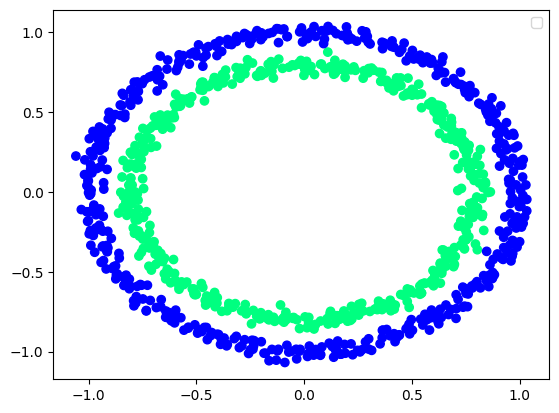

In [4]:
# Following the guidlines of model evaluation, let's first plot the data to get a general sense of what are we working with
import matplotlib.pyplot as plt
plt.scatter(X[:,0], # The x-axis will contain the x coordinates of all the data points
            X[:,1], # The y-axis will contain the y coordinates of all the data points
            c = y, # Coloring data points based off their label y
            cmap = 'winter'); # The color palette

By looking at the plot, our goal is to build a model that can accurately seperate the green dots (class 1) from the blue ones (class 0).

In [9]:
# Checking the data to determine the input and output shapes
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [10]:
X.shape, y.shape

((1000, 2), (1000,))

In [11]:
X[0].shape, y[0].shape

((2,), ())

The model we're going to build will take the coordinates of a data point, and using them, try to classify it into either class 0 or class 1.
The input shape for the model is (2,1), while the output is a scalar (1)

#Building a Basic TensorFlow Classification Model

Now that we have our data ready, we'll start to build the first classification model.

For starters, we'll build a very basic classification model consisting of one dense layer with 1 neuron, and fit for 10 epochs.

**Note:** as with any other machine learning problem, we must perform cross-validation, but since we're working with a toy dataset we did not split the data.

In [17]:
# the most basic model
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy']) # Accuracy will be used as a metric, classification evaluation metrics will be discussed later

model_1.fit(X, y, epochs = 10)

Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: 4.3061 - accuracy: 0.5000
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 4.1755 - accuracy: 0.5000
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 4.0347 - accuracy: 0.5000
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 4.0257 - accuracy: 0.5000
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 4.0032 - accuracy: 0.5000
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 3.9770 - accuracy: 0.5000
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 3.9553 - accuracy: 0.5000
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 3.8645 - accuracy: 0.5000
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 3.7924 - accuracy: 0.5000
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 3.7640 - accuracy: 0.5000


Even with such a small model we achieved an accuracy of almost 46%, but alas this is not a good result, because since we are working with binary classification problem, with a ~50% accuracy the model is simply guessing to which class should a datapoint belong.

Since the results are unsatisfactory, we'll try to improve our model by following the model improvement guidelines and add more hidden layers and more neurons in each hidden layer, and/or train for longer.

In [18]:
# An improved model
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10), # New hidden layer with 10 units
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_2.fit(X, y, epochs = 100) # training for 100 epochs instead of 10

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3080 - accuracy: 0.4650
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9770 - accuracy: 0.4700
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 3.4754 - accuracy: 0.4680
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 2.3035 - accuracy: 0.4690
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7927 - accuracy: 0.4590
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7345 - accuracy: 0.4580
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7164 - accuracy: 0.4590
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7060 - accuracy: 0.4580
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7002 - accuracy: 0.4580
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.4510
Epoch 11/

No improvement at all, and the model still is classifying data randomly.

So what could be the problem here? The previous two models that we've built consist of only linear dense layers $y = mX + p$, and the question is, are straight lines enough to seperate the two circular clusters of datapoints we're working with? The answer is no.

For cases like these, **non-linearity** must be implemented.

The **non-linearity** property means that we're modeling a complex, non-linear relationship between features and labels, and in deep learning it can be introduced through the usage of **activation functions**.

**Activation function** in deep learning are functions that change the behaviour of the outputs of the hidden layers (the sum of the weighted input data of the neuron + bias of the neuron) and add a non-linear property to them. Some examples of non-linear activation functions: ReLU (Recitfied Linear Unit), Sigmoid, Tanh (Hyperbolic Tangent), Softmax, etc...

In [21]:
# Creating a model with non-linear activation functions
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_3.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6975 - accuracy: 0.5050
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.4980
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5010
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5020
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5060
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.4950
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5100
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.5360
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.5740
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6856 - accuracy: 0.5290
Epoch 11/

As with the case of regression problems, we need some way to quantify how wrong our model is during the fitting phase.

Classification has it own set of loss functions. The most common loss functions are:

1.   **Cross Entropy Loss / Log loss** - This is the most common loss function used in classification problems. The cross-entropy loss decreases as the predicted probability converges to the actual label. It measures the performance of a classification model whose predicted output is a probability value between 0 and 1. When the classification problem is binary, `.BinaryCrossentropy()` entropy is used:
$logloss=-\frac{1}{N} \sum_{i=1}^N\left(y_i \cdot \log \left(\hat{y}_i\right)+\left(1-y_i\right) \cdot \log \left(1-\hat{y}_i\right)\right)$

  and for multiclass classification `.CategoricalCrossEntropy()` is used:
$logloss=-\frac{1}{N} \sum_{i=1}^N y_i \cdot \log \left(\hat{y}_i\right)$

2.   **Hinge Loss** - The second most common loss function used for classification problems and an alternative to the cross-entropy loss function is hinge loss, primarily developed for support vector machine (SVM) model evaluation. Can be accessed through `.Hinge()`
$hingeloss=\max (0,1-y * f(x))$

In [23]:
X[:10], y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [27]:
tf.math.round(model_3.predict(tf.expand_dims([0.75424625, 0.23148074], axis = 0)))

1/1 [==============================] - 0s 53ms/step


<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>

So, how do we evaluate our classification model? There exists a wide range of evaluation metrics than can show us how well our model performs. Some of them are:

1.   **Confusion Matrix** - that shows the true positives (TP), true negatives (TN), false positives (FP) and false negatives (FN) of the model.
2.   **Classification Report** - that contains the accuracy, precision, recall, f1-score of our model.
  *   **Accuracy** shows how often a classification ML model is correct overall. $accuracy=\frac{T P+T N}{T P+T N+F P+F N}$
  *   **Precision** is a metric that measures how often a machine learning model correctly predicts the positive class. Precision answers the question: how often the positive predictions are correct?
 $precision=\frac{{TP}}{{TP + FP}}$
  * **Recall (Sensitivity)** is a metric that measures how often a machine learning model correctly identifies positive instances (true positives) from all the actual positive samples in the dataset. Recall answers the question: can an ML model find all instances of the positive class? $recall=\frac{{TP}}{{TP + FN}}$


3. **ROC Curve and AUC** - **ROC Curve** (Receiver Operator Characteristics Curve) plots the rate of true positives (TPR) against the rate of false positives (FPR) of a model's predictions and shows the performance of a said model at all classification thresholds.

  **AUC** (Area Under the Curve) measures the entire two-dimensional area underneath the entire ROC curve. The AUC can be used as a summary measure for comparing the performance of different tests. It can also be used to compare the performance of different models for predicting the same outcome.

